In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris #for validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist #for validation




In [2]:
train_data = pd.read_csv('data/sign_mnist_train.csv')

test_data = pd.read_csv('data/sign_mnist_test.csv')


In [3]:
train_data.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [4]:
y_train = train_data.iloc[:,0]
y_train.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [9]:
train_label_freq = y_train.groupby(y_train).count()
train_label_freq.head()

label
0    1126
1    1010
2    1144
3    1196
4     957
Name: label, dtype: int64

<AxesSubplot:xlabel='label'>

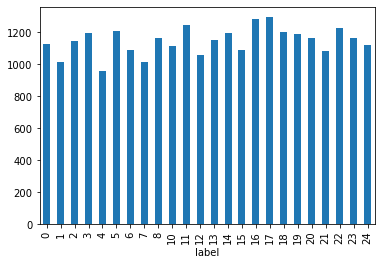

In [10]:


train_label_freq.plot.bar()

In [5]:
# CONSIDER FOR LATER
# I have to recall how to use a bar chart
# to make sure the counts for each label are 
# approx. equal

In [11]:
X_train = train_data.iloc[:,1:]
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [12]:
y_test = test_data.iloc[:,0]
X_test = test_data.iloc[:,1:]

    From the class notebook section BUILDING A CNN USING TENSORFLOW     

In [44]:
# Specific neural network models & layer types
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [13]:
# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (27455, 784)
y_train shape: (27455,)
X_test shape: (7172, 784)
y_test shape: (7172,)


In [46]:
# range of x values
print(f'X range: {X_train.min()}-{X_train.max()}')
# y unique values
print(f'y values: {np.unique(y_train)}')
num_classes = len(np.unique(y_train))
print(f'Number of classes: {num_classes}')

X range: 0-24
y values: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Number of classes: 24


In [47]:
# Define input image dimensions
img_rows, img_cols = 28, 28#NEED the last 2/3 of shape data from X_ sets.

# Reshape for Keras model types
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

AttributeError: 'Series' object has no attribute 'reshape'